/tmp/ipython-input-993968640.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=engagement_df, x='photo type', y='engagement_rate', palette='viridis', ci=None)
/tmp/ipython-input-993968640.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_df, x='photo type', y='engagement_rate', palette='viridis', ci=None)
/tmp/ipython-input-993968640.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=engagement_df, x='Insta filter used', y='engagement_rate', palette='Set2')


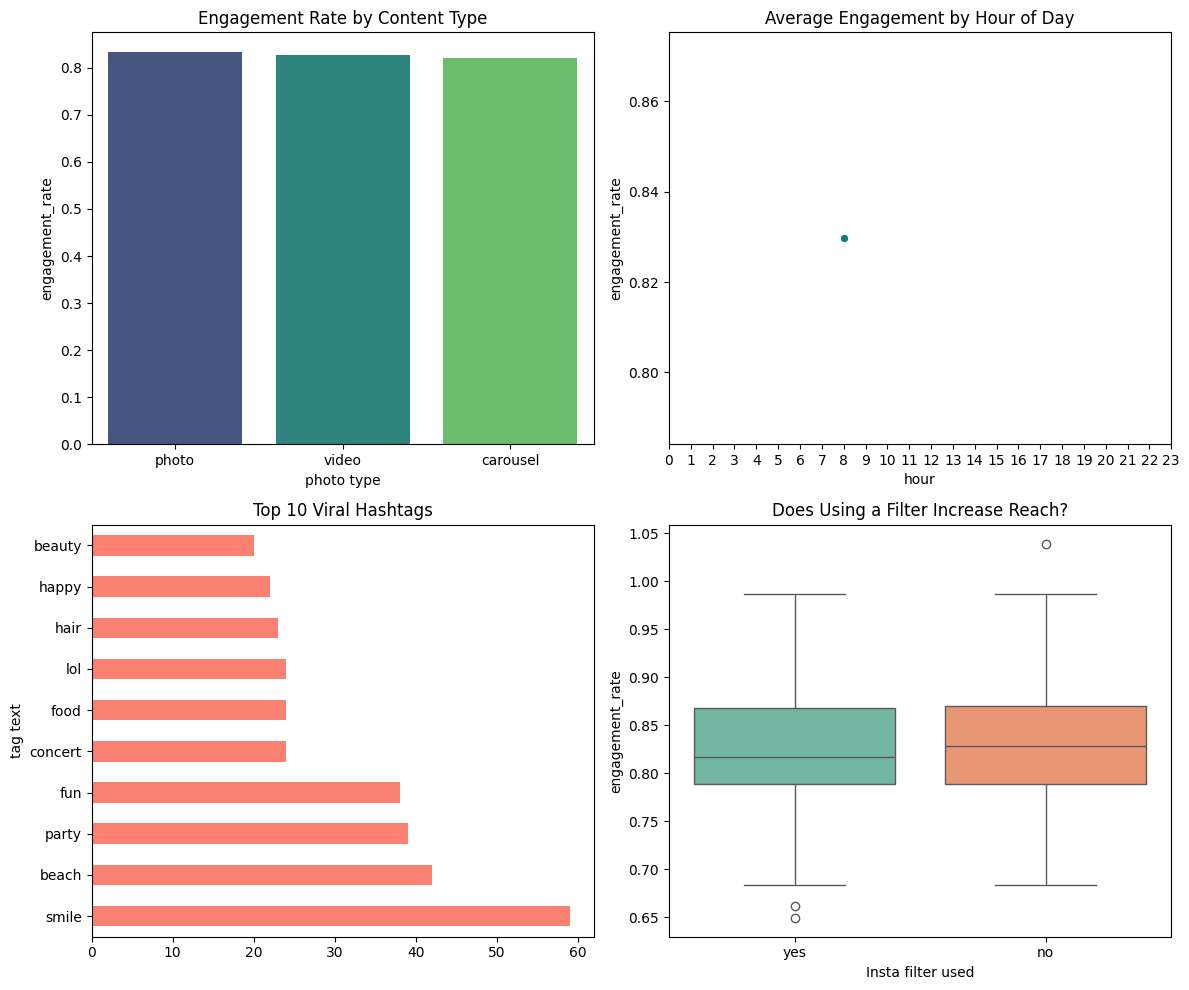

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Instagram Dataset Files
users = pd.read_csv('users.csv')
photos = pd.read_csv('photos.csv')
likes = pd.read_csv('likes.csv')
comments = pd.read_csv('comments.csv')
follows = pd.read_csv('follows.csv')
tags = pd.read_csv('tags.csv')
photo_tags = pd.read_csv('photo_tags.csv')

# Clean column names (strip hidden spaces)
for d in [users, photos, likes, comments, follows, tags, photo_tags]:
    d.columns = d.columns.str.strip()

# 2. Calculate Engagement and Follower Metrics
follower_counts = follows.groupby('followee').size().reset_index(name='follower_count')
likes_per_photo = likes.groupby('photo').size().reset_index(name='like_count')
comments_per_photo = comments.groupby('Photo id').size().reset_index(name='comment_count')

# Merge into a master engagement dataframe
engagement_df = photos.merge(likes_per_photo, left_on='id', right_on='photo', how='left')
engagement_df = engagement_df.merge(comments_per_photo, left_on='id', right_on='Photo id', how='left').fillna(0)
engagement_df['total_engagement'] = engagement_df['like_count'] + engagement_df['comment_count']

# Calculate Engagement Rate per Follower
engagement_df = engagement_df.merge(follower_counts, left_on='user ID', right_on='followee', how='left')
engagement_df['follower_count'] = engagement_df['follower_count'].fillna(1)
engagement_df['engagement_rate'] = engagement_df['total_engagement'] / engagement_df['follower_count']

# 3. Parse Time for Analytics
engagement_df['created dat'] = pd.to_datetime(engagement_df['created dat'], format='%d-%m-%Y %H:%M')
engagement_df['hour'] = engagement_df['created dat'].dt.hour
engagement_df['day'] = engagement_df['created dat'].dt.day_name()

# --- VISUALS ---
plt.figure(figsize=(12, 10))

# Chart 1: Content Type Engagement
plt.subplot(2, 2, 1)
sns.barplot(data=engagement_df, x='photo type', y='engagement_rate', palette='viridis', ci=None)
plt.title('Engagement Rate by Content Type')

# Chart 2: Best Time to Post (Hourly)
plt.subplot(2, 2, 2)
hourly_eng = engagement_df.groupby('hour')['engagement_rate'].mean().reset_index()
sns.lineplot(data=hourly_eng, x='hour', y='engagement_rate', marker='o', color='teal')
plt.title('Average Engagement by Hour of Day')
plt.xticks(range(0, 24))

# Chart 3: Top Hashtags Frequency
plt.subplot(2, 2, 3)
tag_summary = photo_tags.merge(tags, left_on='tag ID', right_on='id')
tag_summary['tag text'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Viral Hashtags')

# Chart 4: Filter Performance
plt.subplot(2, 2, 4)
sns.boxplot(data=engagement_df, x='Insta filter used', y='engagement_rate', palette='Set2')
plt.title('Does Using a Filter Increase Reach?')

plt.tight_layout()
plt.show()